# Chapter 2: Coding Neurons from Scratch

- let's say we have a single neuron and there are three inputs to this neuron
- when we initialize parameters, our neural network is going to have weights initialized randomly and biases set to zero
- input is either going to be direct input data or inputs from the outputs of neurons from the previous layer in our neural network

In [1]:
inputs = [1, 2, 3]

- each input has a weight associated with it
 - let's say the first input, at index 0, which is a 1, has a weight of 0.2, the second input has a weight of 0.8, and the third input has a weight of -0.5
- our inputs and weights lists should look like so:

In [2]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]

- next, we need a bias
 - let's randomly select a value of 2 for the bias

In [3]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

Saving 2.png to 2 (1).png


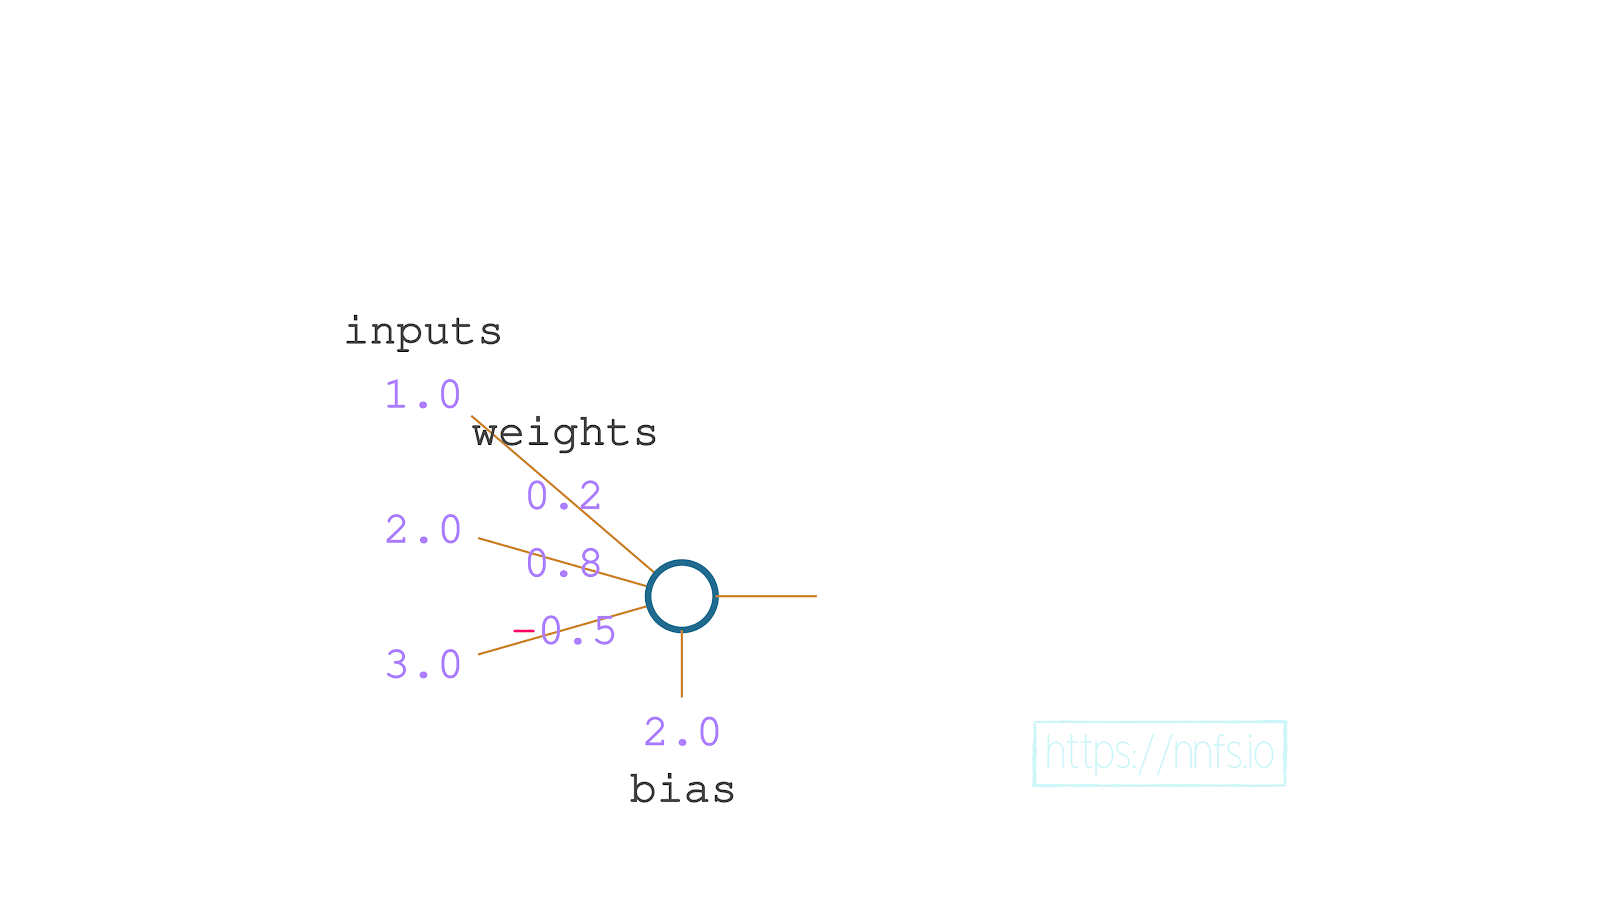

In [37]:
from google.colab import files
from PIL import Image
from io import BytesIO
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['2.png']))
im

- the first operation for this single neuron is to sum each input multipled by that input's weight, then add the bias
- our output should be calculated like so:

In [4]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
output # for a single neuron

2.3

- let's keep the initial 3 inputs and their corresponding 3 weights and add a new, randomly-chosen input (2.5)
- now that we have added another input, we need 4 weights per neuron (instead of 3) 
 - this is because every neuron will have 4 input values coming in

In [5]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2 
bias2 = 3
bias3 = 0.5

outputs = [
    inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
    inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
    inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3
]
outputs

[4.8, 1.21, 2.385]

Saving 3.png to 3 (1).png


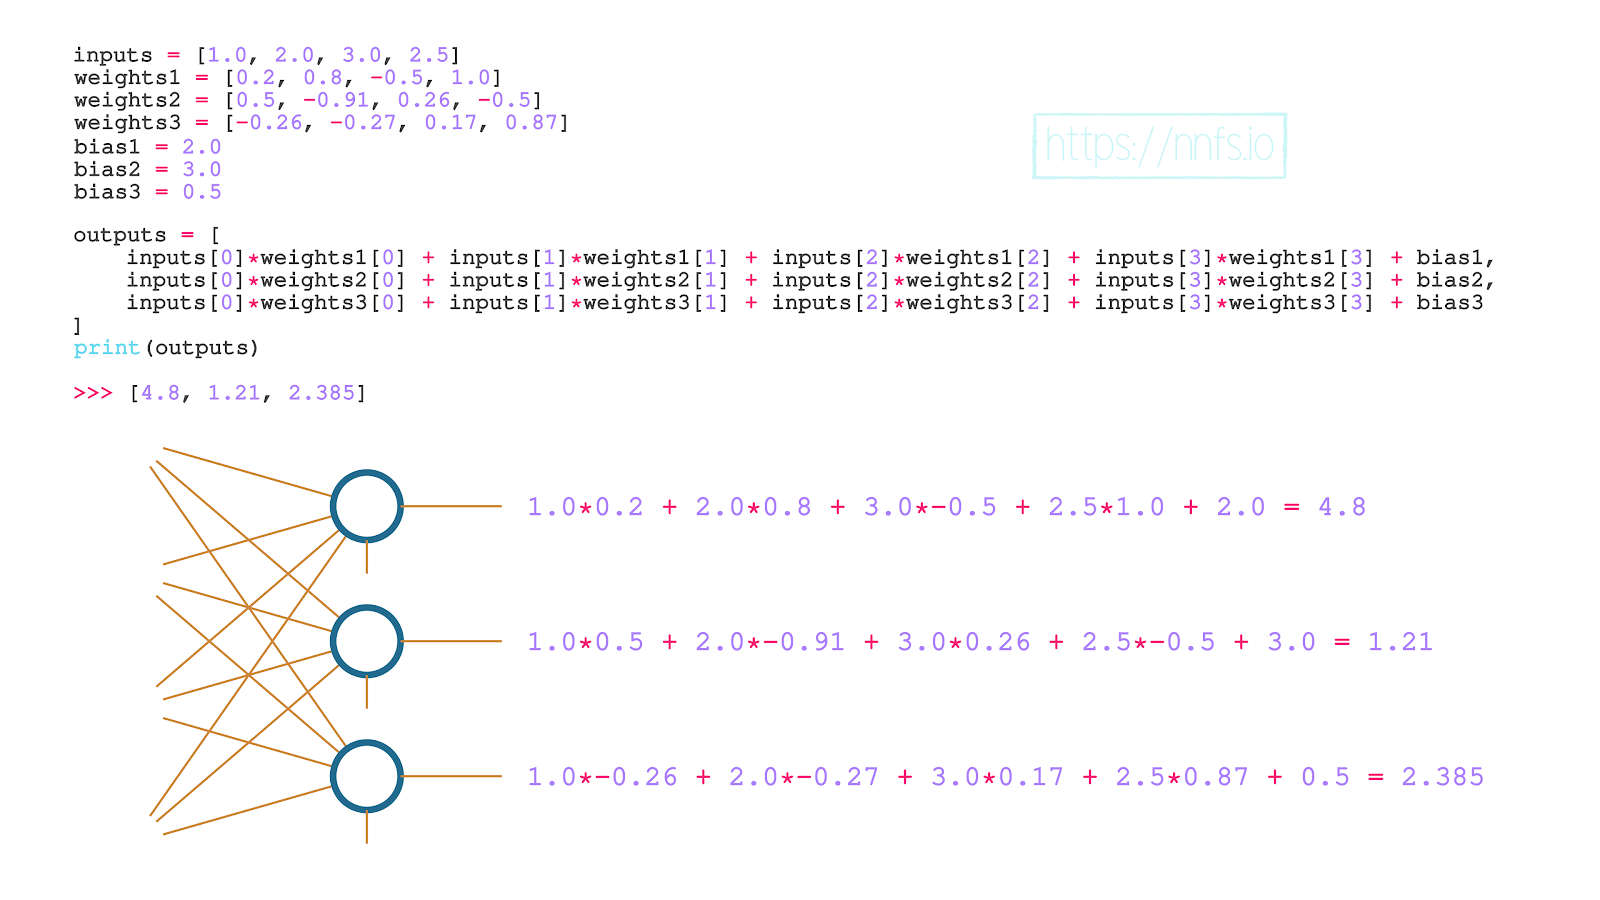

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['3.png']))
im

- in this code, we have three sets of weights and three biases
- each neuron accepts the same inputs 
- all these neurons have the same shape and approach; they are all connected to all four inputs
- the difference is the unique series of weights and biases that each neuron applies to the inputs
- this is a **fully connected** neural network as every neuron has connections to every neuron from the previous layer
---
- at this point, we have only shown code for a single layer with very few neurons; imagine more layers with more neurons
- this would get very challenging to code given our current methods
- instead, we could use a **loop** to scale and handle dynamically-sized inputs

In [6]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

In [7]:
layer_outputs = []  # Output of current layer
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0  # Output of given neuron
    for input, weight in zip(inputs, neuron_weights):
        neuron_output += input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
    
layer_outputs

[4.8, 1.21, 2.385]

- this does the same thing as before, but in a more dynamic and scalable way
- the `zip()` function allows us to iterate over multiple iterables (lists in this case)
- in this case, we know we are dealing with three neurons because we have 3 sets of weights and 3 sets of biases 
- when you make a neural network of your own, you can combine however many inputs with however many neurons as you want
- with our code above that uses loops, we could modify the number of inputs and/or number of neurons and our loop would handle it

### Tensors (among others)
- the reason the largest Deep Learning library in Python is called "TensorFlow" is because it's all about doing operations on **tensors**
- tensors are *very* similar to arrays
- if you interchange tensor/array/matrix in Machine Learning, people will not give you a hard time, however, you should be aware of their subtle differences
- to understand a tensor, let's explain and compare the other data containers in programming (things that hold data) 
- let's start with a list:

In [8]:
l = [1, 2, 3, 4] # list

In [9]:
lol = [[1,5,6,2], # list of lists
       [3,2,1,3]]

In [10]:
lolol = [[[1,5,6,2], # list of lists of lists
          [3,2,1,3]],
         [[5,2,1,2],
          [6,4,8,4]],
         [[2,8,5,3],
          [1,1,9,4]]]

- these three examples could also be an **array** or an array representation of a sensor
- a list, however, is just a list and can do anything it wants:

In [12]:
another_list_of_lists = [[4,2,3], # a non-homologous list of lists
                         [5,1]]

- the above list of lists cannot be an array because it is not **homologous**
- a list of lists is homologous if each list along a dimension is identically long, and this must be true for each dimension
---
- a **matrix** is pretty simple: it is a rectangular array, it has columns and rows, and it is two dimensional
- so a matrix can be a 2D array, but not every array can be a matrix
- an array can be far more than just columns and rows, as it could have any number of dimensions

In [13]:
list_matrix_array = [[4,2],
                     [5,1],
                     [8,2]]

- the above list of lists could be a matrix or an array
- the "shape" of this matrix/array is 3x2 as it has *3 rows and 2 columns*
---
- with a 3-dimensional array like in *lolol*, we have a 3rd level of brackets

In [0]:
lolol = [[[1,5,6,2],  # list of lists of lists
          [3,2,1,3]], # 3-dimensional array 
         [[5,2,1,2],
          [6,4,8,4]],
         [[2,8,5,3],
          [1,1,9,4]]]

- the first level of this array contains 3 matrices
 - thus the size of this dimension is 3

In [14]:
#[[1,5,6,2], # matrix 1
# [3,2,1,3]],

#[[5,2,1,2], # matrix 2
# [6,4,8,4]],

#[[2,8,5,3], # matrix 3
# [1,1,9,4]]

- each matrix has 2 rows and 4 columns
- therefore, the shape of this array is *(3, 2, 4)*
- this is a 3D array
---
- finally, ***a tensor object is an object that can be represented as an array***
- as programmers, this means we can and will treat tensors like arrays in the context of deep learning

### Dot Product
- furthermore, a vector in math is what we call a list in Python or a one-dimensional array in NumPy
- a **cross product** results in a vector while a **dot product** results in a scalar (a singular value)
- a dot product of two vectors is a sum of products of consecutive vector elements
- both vectors must be of the same size (contain an equal number of elements) 

In [15]:
# two vectors
a = [1,2,3]
b = [2,3,4]

- to obtain the dot product, we multiply their elements from the same index values, and then add up all of the resulting products

In [16]:
dot_product = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
dot_product

20

Saving 4.png to 4.png


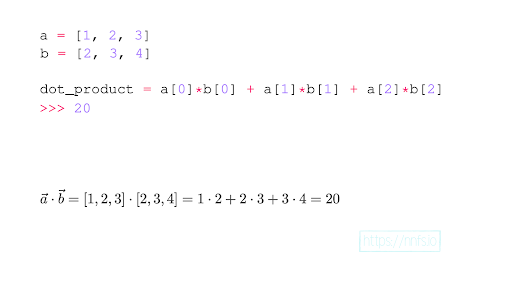

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['4.png']))
im

- now, what if we called $a$ `inputs` and $b$ `weights`; this is familiar
- returning back to the neural network code, let's make use of this dot product:

In [19]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

In [21]:
output = np.dot(weights, inputs) + bias
output

4.8

- now let's calculate the output of a layer with 3 neurons, which means the weights will be a matrix or list of vectors
- we need to perform a dot product of the weights and the input vector, which NumPy makes very easy for us
- NumPy treats this matrix like a list of vectors and performs the dot product one-by-one with each vector returning a list of dot products

In [0]:
inputs = [1.0, 2.0, 3.0, 2.5]            # vector
weights = [[0.2, 0.8, -0.5, 1],          # matrix
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]                 # vector

In [0]:
layer_outputs = np.dot(weights, inputs) + biases
layer_outputs # list of dot products (neuron outputs)

array([4.8  , 1.21 , 2.385])

- to explain the order of parameters we are passing to `np.dot()`, think of it as whatever comes first determines the output shape
- in our case, we are passing a list of neurons first, and the inputs, second, as our goal is to get a list of neuron outputs
- as just discussed, a dot product of a matrix and a vector results in a list of dot products 
- it treats the matrix as a list of vectors and performs a dot product of each of those vectors with the input vector

### Feature Sets
- neural networks receive data in **batches** to train
- the example input data we have been using thus far has only been one sample (or **observation**) of various features called a *feature set*: 

In [0]:
inputs = [1, 2, 3, 2.5] # shape (4,) --> 4 columns

- in the example here, the inputs are somehow meaningful and descriptive to the output we desire
- imagine each number as a value from a different sensor, all at the same time
- each of these values is a feature, and together they form a **feature set**, also called an observation

Saving 5.png to 5.png


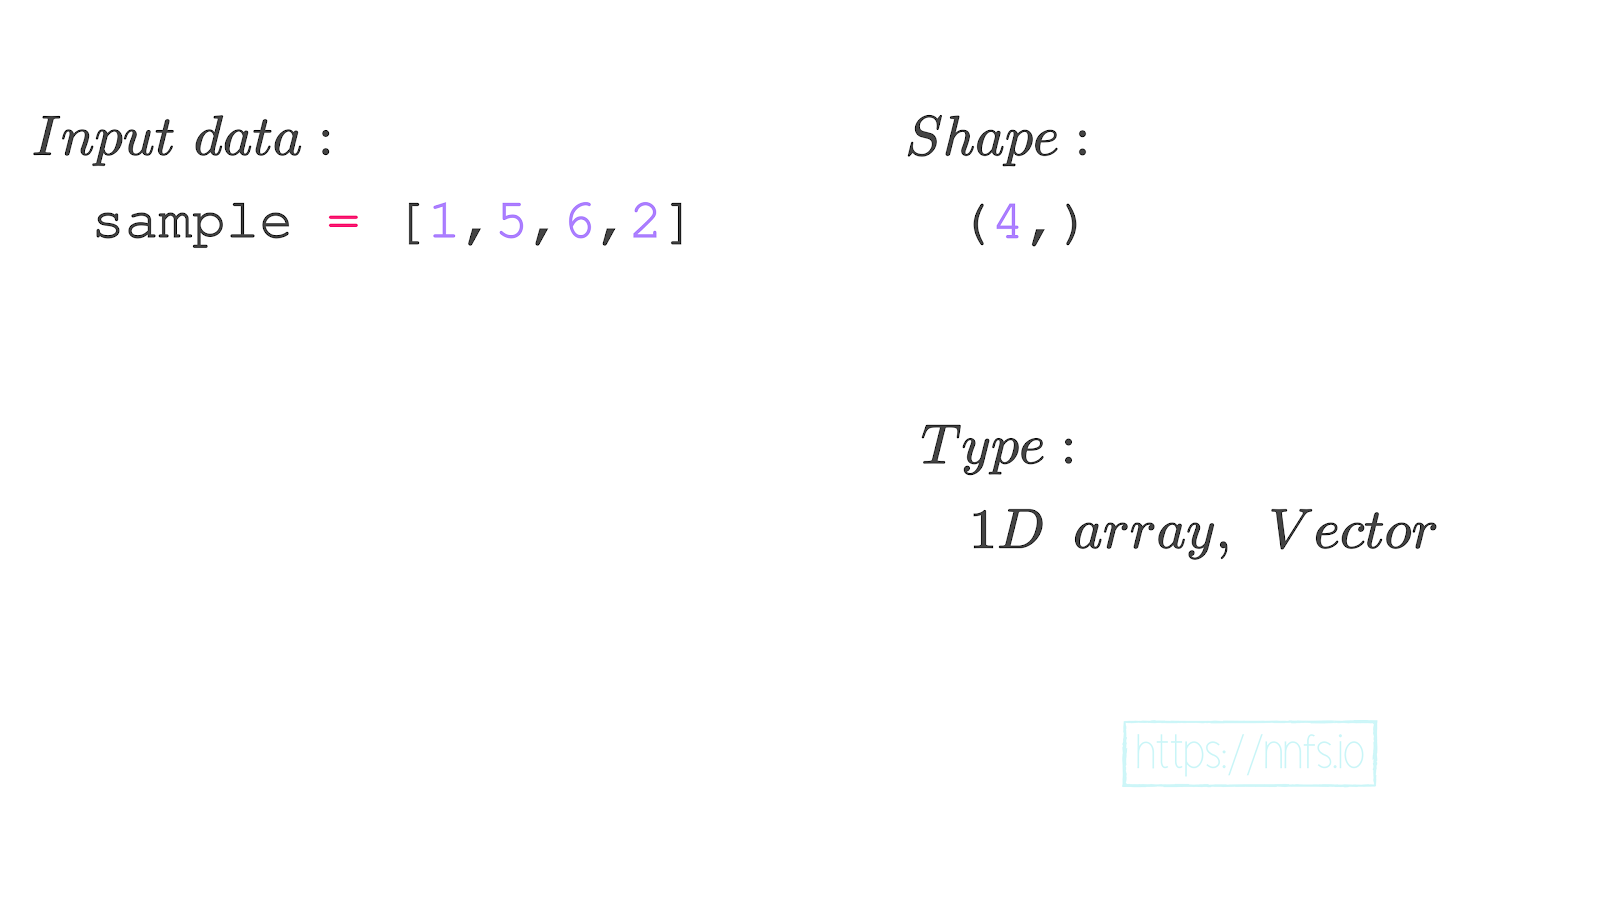

In [38]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['5.png']))
im

- often, neural networks expect to take in many feature sets at a time
- one reason is because it's faster to train in batches in parallel processing
- another reason is because batches help with generalization during training
- fitting/training in batches gives you a higher chance of making more meaningful changes to weights and biases
- in Python, lists are useful containers for holding a feature set and multiple feature sets which make up a batch of observations

In [0]:
inputs = [[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]] # batch

- this list of lists could be made into an array since it is homologous
- each "list" in this larger list is a feature set (**also referred to as samples or observations**)

### Matrix Product
- when we have a matrix of inputs and a matrix of weights and want to perform the dot product, the resulting output is a matrix of outputs, and thus this operation is called the **matrix product**
- to perform the matrix product, the size of the *second* dimension of the *left* matrix must match the size of the *first* dimension of the *right* matrix
---
- for example, if the left matrix has a shape of (5, 4), the right matrix can have a shape of (4, 7)
- the shape of the resulting matrix is always the first dimension of the left matrix and the second dimension of the right matrix
- in this case, the resulting matrix would have the shape (5, 7)
---
- we can also perform the matrix product on vectors 
- in mathematics, we can have column vectors and row vectors 
- they are basically vectors, but represented as a matrix with one of the dimensions having a size of 1
- we perform matrix product on them instead of dot product, which results in a matrix containing one value

### Transposition
- we went from 2 vectors to row and column vectors 
- we used the *relation* of the dot product and the matrix product as the dot product of 2 vectors produces an equivalent output to the matrix product of a row and column vector

In [40]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['6.gif']))
im

Saving 6.gif to 6.gif


- column vector *b* is actually a **transposed** vector *b*
- **transposition** simply modifies a matrix in a way that its rows become columns and its columns become rows

Saving 7.png to 7.png


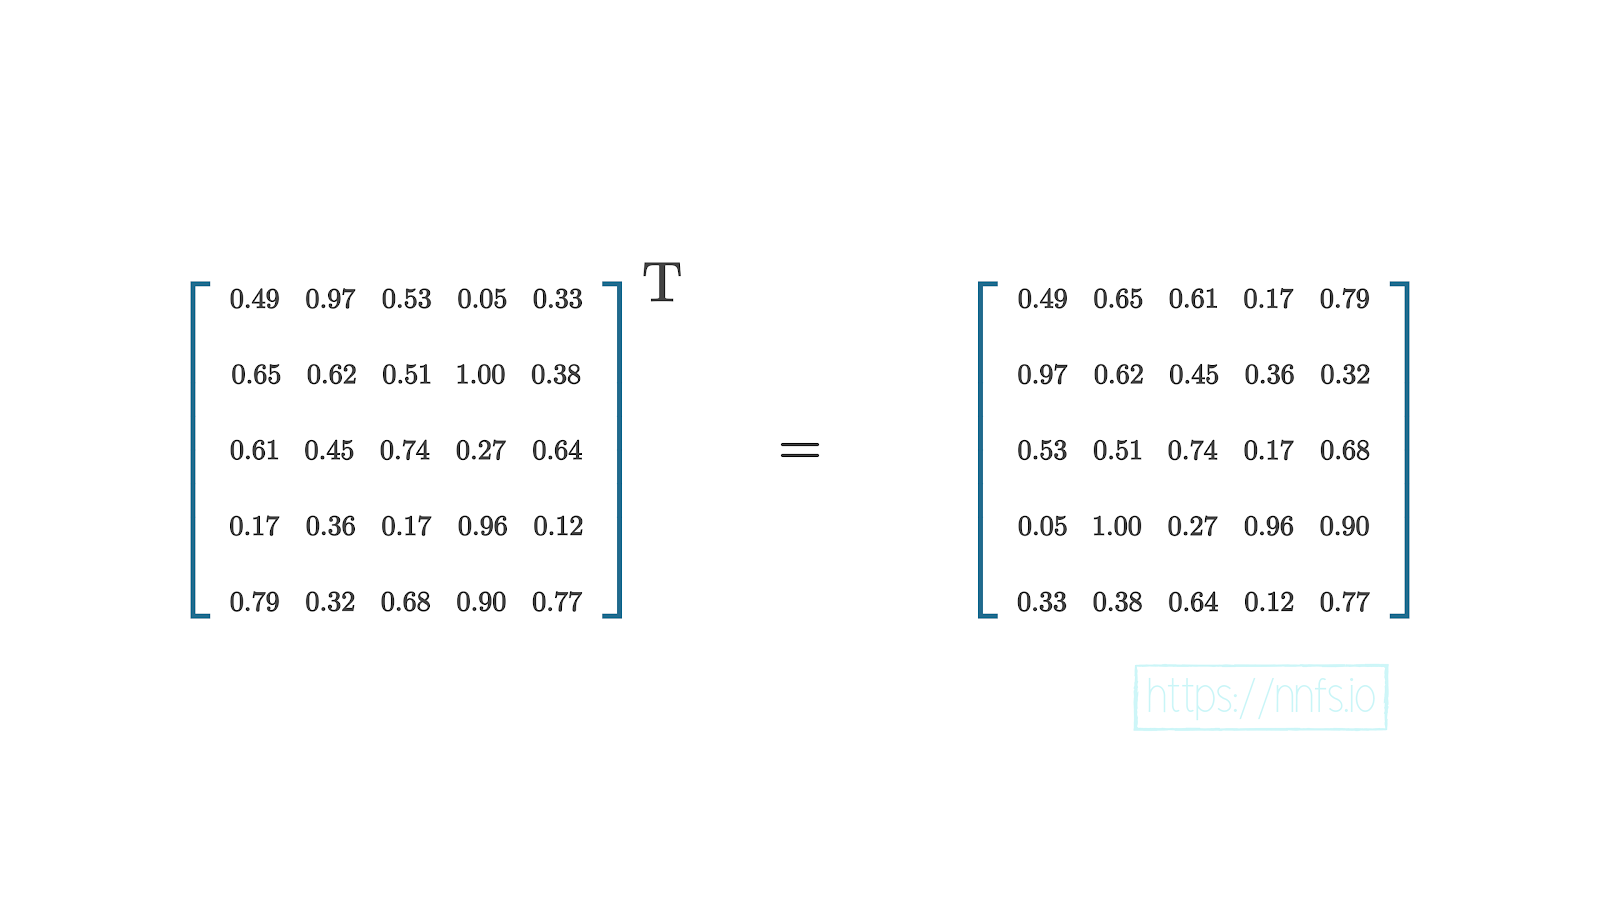

In [41]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['7.png']))
im

- following up with what we previously discussed, a row vector is a matrix whose first dimension's size equals 1
 - in other words, a row vector is a 1xn array

In [44]:
a = [1, 2, 3]
np.array([a])

array([[1, 2, 3]])

- we use brackets around *a* to transform it from a list to a matrix

In [45]:
a = [1, 2, 3]
np.expand_dims(np.array(a), axis=0)

array([[1, 2, 3]])

- where `np.expand_dims()` adds a new dimension at the index of `axis`
- a column vector is a matrix where the second dimension's size equals 1 
- in other words, a column vector is a nx1 array
- a column vector can be created similarly to a row vector with NumPy, but it needs to be additionally transposed

In [48]:
a = [1, 2, 3]
b = [2, 3, 4]

a = np.array([a])   # row vector
b = np.array([b]).T # column vector

np.dot(a, b)

array([[20]])

- with that, we have achieved the same result as with the dot product of 2 vectors but returned as a matrix
- NumPy does not have a special way to perform matrix product
---
- for example, let's go back to our neurons: 

In [0]:
inputs = [1.0, 2.0, 3.0, 2.5]            # vector
weights = [[0.2, 0.8, -0.5, 1],          # matrix
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]                 # vector

In [52]:
outputs = np.dot(inputs, np.array(weights).T) + biases # matrix product | reversed order from previous example
outputs

array([4.8  , 1.21 , 2.385])

- previously, weights were the first parameter in `np.dot()`, however, we reversed the order in our example above
- this is because we want the resulting array to be sample-related and not neuron-related as we'll be passing those samples through the network and the next layer is going to be expecting a batch of numbers as well

In [57]:
inputs = [[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]]  
weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5] 

layer_outputs = np.dot(inputs, np.array(weights).T) + biases # matrix product
layer_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

- if you've used any deep learning libraries, this is why, even when you want to make a single prediction, you pass in a list of inputs (even if it's just one feature set), which returns a list of predictions (even if there's just one prediction)